# ROMY - Barometric Models

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from src.baroseis import baroseis


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in la

AttributeError: _ARRAY_API not found

### Configurations

In [2]:
station = "ROMY" # "FUR" or "ROMY" or "DROMY"

date = "20240312"
# date = "20240315"
# date = "20240316"
# date = "20240321"
# date = "20240423"
# date = "20240324"
# date = "20240829"

# Frequency range
fmin = 5e-4
fmax = 1e-2

save_figs = False

# select channel: A = tilt, J = rotation rate, H = acceleration
cha ="*A*"

# load config
config = baroseis.load_from_yaml(f"./config/config_FFBI_{station}_{date}_file.yaml")

path_to_figs = f"./figures/{date}/"

### Load Spatial Pressure Gradients

In [3]:
from functions.read_sds import read_sds

In [4]:
# gradient = obs.read(f"./data/pressure_gradient_{date}.mseed")
gradient = read_sds(f"./data/", "BW.PROMY.01.LDE", config['tbeg'], config['tend'])
gradient += read_sds(f"./data/", "BW.PROMY.01.LDN", config['tbeg'], config['tend'])


gradient = gradient.detrend("linear")
gradient = gradient.detrend("demean")
gradient = gradient.taper(0.05, "cosine")
gradient = gradient.filter("bandpass", freqmin=5e-4, freqmax=0.002, corners=4, zerophase=True)

gradient = gradient.trim(config['tbeg'], config['tend'])
gradient = gradient.detrend("demean")
gradient = gradient.taper(0.05, "cosine")
gradient

2 Trace(s) in Stream:
BW.PROMY.01.LDE | 2024-03-12T09:00:00.000000Z - 2024-03-12T18:00:00.000000Z | 1.0 Hz, 32401 samples
BW.PROMY.01.LDN | 2024-03-12T09:00:00.000000Z - 2024-03-12T18:00:00.000000Z | 1.0 Hz, 32401 samples

In [5]:
# Initialize baroseis object
bs = baroseis(conf=config)

# Load data specified in config
bs.load_data()

Creating new Hilbert transform data...
 -> No resampling required!

>Runtime: 0.0 minutes



In [6]:
bs.st

5 Trace(s) in Stream:
BW.FFBI..BDO   | 2024-03-12T08:00:00.005000Z - 2024-03-12T19:00:00.005000Z | 1.0 Hz, 39601 samples
BW.ROMY.40.BJE | 2024-03-12T07:59:59.997800Z - 2024-03-12T18:59:59.997800Z | 1.0 Hz, 39601 samples
BW.ROMY.40.BJN | 2024-03-12T07:59:59.980599Z - 2024-03-12T18:59:59.980599Z | 1.0 Hz, 39601 samples
BW.ROMY.40.BJZ | 2024-03-12T08:00:00.004199Z - 2024-03-12T19:00:00.004199Z | 1.0 Hz, 39601 samples
BW.FFBI..BDH   | 2024-03-12T08:00:00.005000Z - 2024-03-12T19:00:00.005000Z | 1.0 Hz, 39601 samples

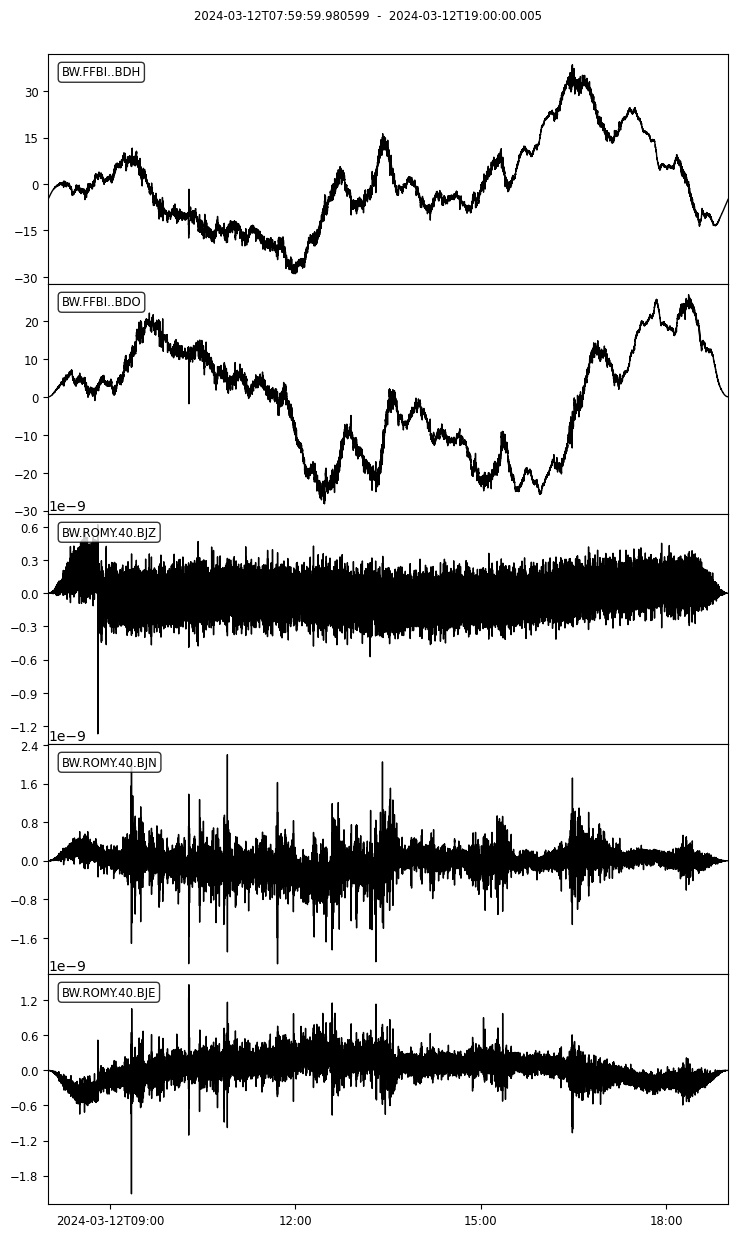

In [7]:
bs.st.plot(equal_scale=False);

Removing mean and trend...
Applying bandpass filter: 0.0005-0.01 Hz


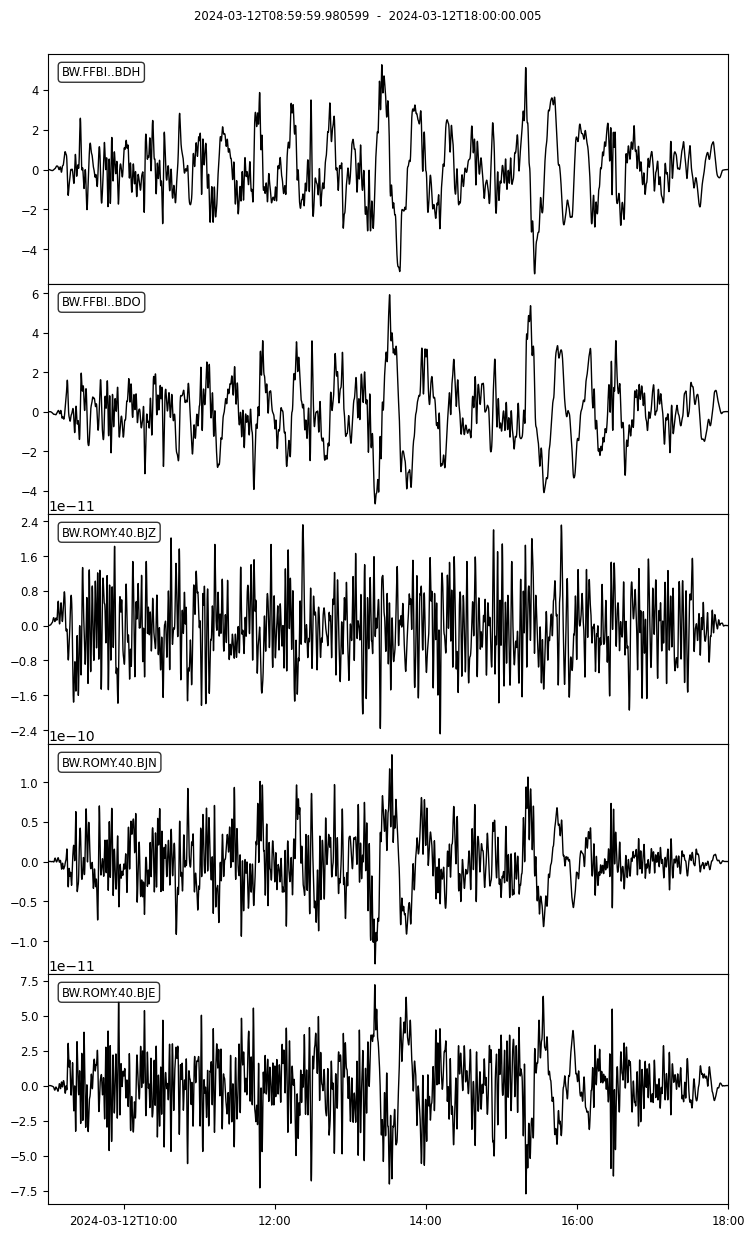

In [8]:
# band pass filer
bs.filter_data(fmin=fmin, fmax=fmax)

# # detrend
# bs.st.detrend("demean")

# # taper edges
# bs.st.taper(0.1, "cosine")

# if station == "ROMY":
#     # integrate rotation to tilt
#     bs.integrate_data(method="cumtrapz") # method = "cumtrapz" or "spline"

# elif station == "FUR" or station == "DROMY":
#     # convert acceleration to tilt
#     for tr in bs.st:
#         if tr.stats.channel[1] == "H":
#             tr.stats.channel = tr.stats.channel[0] + "A" + tr.stats.channel[-1]
#             if tr.stats.channel[-1] in ["N", "E"]:
#                 tr.data = -tr.data/9.81
    
# trim waveforms
bs.st = bs.st.trim(bs.config['tbeg'], bs.config['tend'])

# detrend waveforms
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.05, "cosine")

# show new waveforms
bs.st.plot(equal_scale=False);


In [9]:
def model_tilt(seis_stream, pressure_data):
    """
    Simple model for predicting tilt/rotation from pressure data.
    
    Args:
        seis_stream: Stream with seismic data
        pressure_data: List of pressure arrays [P, H, DP, DH]
    
    Returns:
        Dictionary with predicted_data, coefficients, variance_reduction, residuals
    """
    
    # Get seismic data
    components = ['N', 'E', 'Z']
    seis_data = {}
    
    for comp in components:
        try:
            tr = seis_stream.select(component=comp).copy()[0]
            seis_data[comp] = tr.data
        except:
            continue
    
    if not seis_data:
        raise ValueError("No seismic data found")
    
    # Ensure all data has same length
    data_length = len(pressure_data[0])
    for comp in seis_data:
        if len(seis_data[comp]) != data_length:
            # Simple interpolation
            from scipy.interpolate import interp1d
            x_old = np.linspace(0, 1, len(seis_data[comp]))
            x_new = np.linspace(0, 1, data_length)
            f = interp1d(x_old, seis_data[comp], kind='linear', fill_value='extrapolate')
            seis_data[comp] = f(x_new)
    
    # Create design matrix
    A = np.column_stack(pressure_data)
    
    # Results
    results = {
        'predicted_data': {},
        'coefficients': {},
        'variance_reduction': {},
        'residuals': {}
    }
    
    # Process each component
    for comp, seis_comp_data in seis_data.items():
        # Least squares: A * x = b
        coefficients = np.linalg.lstsq(A, seis_comp_data, rcond=None)[0]
        predicted_data = A @ coefficients
        
        # Variance reduction
        original_var = np.var(seis_comp_data)
        residual_var = np.var(seis_comp_data - predicted_data)
        var_reduction = ((original_var - residual_var) / original_var) * 100
        
        # Store
        results['predicted_data'][comp] = predicted_data
        results['coefficients'][comp] = coefficients
        results['variance_reduction'][comp] = var_reduction
        results['residuals'][comp] = seis_comp_data - predicted_data
    
    return results

### Modeling Workflow

In [10]:
# make rotation rate data
seis_rot = bs.st.select(channel="*J*").copy()

# rename for later code
for tr in seis_rot:
    tr.stats.channel = tr.stats.channel[0] + "A" + tr.stats.channel[-1]

# trim waveforms
seis_rot = seis_rot.trim(bs.config['tbeg'], bs.config['tend'])

# detrend
seis_rot = seis_rot.detrend("demean")
seis_rot = seis_rot.detrend("simple")

# taper edges
seis_rot = seis_rot.taper(0.05, "cosine")

In [11]:
# define model
model_data = [
    bs.st.select(channel="*DO").copy()[0].data,
    bs.st.select(channel="*DO").copy()[0].differentiate().data,
]

# Run model
model1 = model_tilt(seis_rot, model_data)

# Access results
print("Variance reduction:")
for comp in model1['predicted_data']:
    print(f"{comp}: {model1['variance_reduction'][comp]:.1f}%")

# make stream with residuals
seis_model1_residuals = seis_rot.copy()
for tr in seis_model1_residuals:
    ch = tr.stats.channel[2]
    tr.data = model1['residuals'][ch]


Variance reduction:
N: 60.6%
E: 63.3%
Z: 3.2%


In [ ]:
# make tilt data
seis_tilt = seis_model1_residuals.copy()

for tr in seis_tilt:
    tr.integrate(method="cumtrapz")

# detrend waveforms
seis_tilt.detrend("linear")
seis_tilt.detrend("demean")
seis_tilt.detrend("simple")

# taper edges
# seis_tilt.taper(0.05, "cosine")


3 Trace(s) in Stream:
BW.ROMY.40.BAE | 2024-03-12T08:59:59.997800Z - 2024-03-12T17:59:59.997800Z | 1.0 Hz, 32401 samples
BW.ROMY.40.BAN | 2024-03-12T08:59:59.980599Z - 2024-03-12T17:59:59.980599Z | 1.0 Hz, 32401 samples
BW.ROMY.40.BAZ | 2024-03-12T09:00:00.004199Z - 2024-03-12T18:00:00.004199Z | 1.0 Hz, 32401 samples

### Model Gradient

In [13]:
# define model
pressure_data = [
    # bs.st.select(channel="*DO").copy()[0].data,
    # bs.st.select(channel="*DH").copy()[0].data,
    # bs.st.select(channel="*DO").copy()[0].differentiate().data,
    # bs.st.select(channel="*DH").copy()[0].differentiate().data,
    gradient.select(channel="*DN").copy()[0].data,
    gradient.select(channel="*DE").copy()[0].data,
    # gradient.select(channel="*DN").copy()[0].differentiate().data,
    # gradient.select(channel="*DE").copy()[0].differentiate().data
]

# run model
model2 = model_tilt(seis_tilt.copy(), pressure_data)

# access results
print("Variance reduction:")
for comp in model2['predicted_data']:
    print(f"{comp}: {model2['variance_reduction'][comp]:.1f}%")

# make stream with residuals
seis_model2_residuals = seis_tilt.copy()
for tr in seis_model2_residuals:
    ch = tr.stats.channel[2]
    tr.data = model2['residuals'][ch]


Variance reduction:
N: 4.8%
E: 10.1%
Z: 1.1%


In [14]:
def plot_vr_comparison(model_list, figsize=(8, 5)):
    """
    Simple variance reduction comparison plot for a list of models.
    
    Args:
        model_list: List of dictionaries, each with 'name' and 'variance_reduction' keys
        figsize: Figure size tuple
    
    Example:
        models = [
            {'name': 'Basic', 'variance_reduction': {'N': 45, 'E': 38, 'Z': 52}},
            {'name': 'With Derivatives', 'variance_reduction': {'N': 67, 'E': 61, 'Z': 73}},
            {'name': 'Advanced', 'variance_reduction': {'N': 72, 'E': 69, 'Z': 79}}
        ]
        plot_vr_comparison(models)
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Colors for different models
    colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
    
    components = ['N', 'E', 'Z']
    x = np.arange(len(components))
    width = 0.8 / len(model_list)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for i, model in enumerate(model_list):
        vr_values = [model['variance_reduction'].get(comp, 0) for comp in components]
        ax.bar(x + i * width, vr_values, width, 
               label=model['name'], color=colors[i % len(colors)], alpha=0.8)
        
    ax.set_ylabel('Variance Reduction (%)')
    ax.set_title('Variance Reduction Comparison')
    ax.set_xticks(x + width * (len(model_list) - 1) / 2)
    ax.set_xticklabels(f"{comp}-component" for comp in components)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 100)
    
    plt.tight_layout()
    return fig

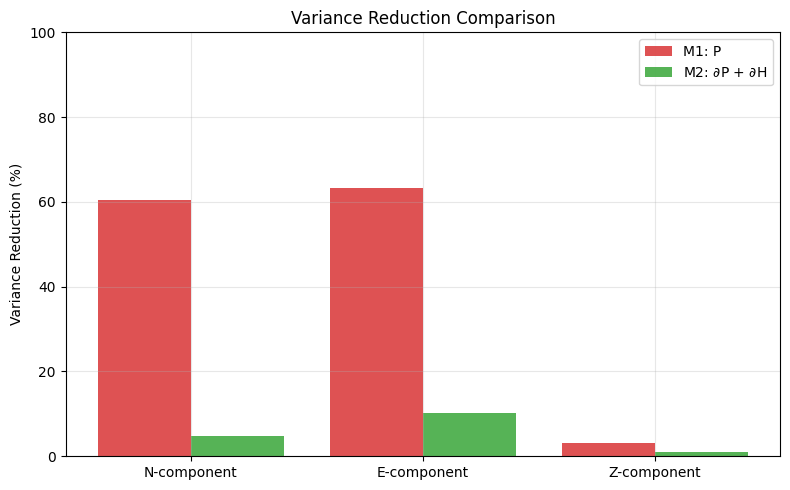

In [15]:
# Define your models
models = [
    {'name': r'M1: P', 'variance_reduction': model1['variance_reduction']},
    {'name': r'M2: $\partial$P + $\partial$H', 'variance_reduction': model2['variance_reduction']},
]

# Plot
fig = plot_vr_comparison(models)

if save_figs:
    fig.savefig(f"{path_to_figs}{date}_{station}_{cha.replace('*', '')}_model_vr_comparison.png", dpi=150, bbox_inches="tight")

In [16]:
def plot_component_modeling(model_rot_dict, model_tilt_dict, component='N', 
                           time_unit='hours', figsize=(12, 8)):
    """
    Plot modeling results for one component showing rotation and tilt data.
    
    Uses the model dictionary format with keys: 'predicted_data', 'residuals', 'variance_reduction'
    Each containing dictionaries with component keys ('N', 'E', 'Z').
    
    Args:
        model_rot_dict: Model dictionary for rotation with format:
            {'predicted_data': {comp: array}, 'residuals': {comp: array}, ...}
        model_tilt_dict: Model dictionary for tilt with same format
        component: Component to plot ('N', 'E', or 'Z')
        time_unit: Time unit for x-axis ('hours', 'days', 'minutes', 'seconds')
        figsize: Figure size tuple
    
    Returns:
        matplotlib figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Scaling
    yscale = 1e9  # to nano
    tscale_dict = {"hours": 1/3600, "days": 1/86400, "minutes": 1/60, "seconds": 1}
    tscale = tscale_dict.get(time_unit, 1/3600)
    

    # Extract data from model dictionaries
    model_rot = model_rot_dict.get('predicted_data', {}).get(component)
    residual_rot = model_rot_dict.get('residuals', {}).get(component)
    if model_rot is None or residual_rot is None:
        raise ValueError(f"Component {component} not found in rotation model dictionary")
    # Original data = predicted + residual
    data_rot = model_rot + residual_rot
    
    model_tilt = model_tilt_dict.get('predicted_data', {}).get(component)
    residual_tilt = model_tilt_dict.get('residuals', {}).get(component)
    if model_tilt is None or residual_tilt is None:
        raise ValueError(f"Component {component} not found in tilt model dictionary")
    
    # Original data = predicted + residual
    data_tilt = model_tilt + residual_tilt
    
    # Convert to numpy arrays
    data_rot = np.array(data_rot)
    model_rot = np.array(model_rot)
    residual_rot = np.array(residual_rot)
    data_tilt = np.array(data_tilt)
    model_tilt = np.array(model_tilt)
    residual_tilt = np.array(residual_tilt)
    
    # Ensure all arrays have same length
    min_len = min(len(data_rot), len(model_rot), len(residual_rot),
                  len(data_tilt), len(model_tilt), len(residual_tilt))

    data_rot = data_rot[:min_len] * yscale
    model_rot = model_rot[:min_len] * yscale
    residual_rot = residual_rot[:min_len] * yscale

    data_tilt = data_tilt[:min_len] * yscale
    model_tilt = model_tilt[:min_len] * yscale
    residual_tilt = residual_tilt[:min_len] * yscale
    
    # find y-axis limits
    y_max_rot = np.max(np.abs([data_rot, model_rot, residual_rot]))
    y_max_tilt = np.max(np.abs([data_tilt, model_tilt, residual_tilt]))


    # Time array
    times = np.arange(len(data_rot)) * tscale
    
    # Get variance reductions from model dictionaries if available
    vr_rot = model_rot_dict.get('variance_reduction', {}).get(component)
    if vr_rot is None:
        orig_var = np.var(data_rot)
        res_var = np.var(residual_rot)
        vr_rot = ((orig_var - res_var) / orig_var) * 100 if orig_var > 0 else 0
    
    vr_tilt = model_tilt_dict.get('variance_reduction', {}).get(component)
    if vr_tilt is None:
        orig_var = np.var(data_tilt)
        res_var = np.var(residual_tilt)
        vr_tilt = ((orig_var - res_var) / orig_var) * 100 if orig_var > 0 else 0
    
    # Create figure with 4 subplots
    fig, axes = plt.subplots(4, 1, figsize=figsize, sharex=True)
    
    # Colors
    color_data = 'k'
    color_model1 = 'tab:red'
    color_model2 = 'tab:blue'
    color_residual = 'grey'
    
    # Plot 1: Rotation - Original and Model
    axes[0].plot(times, data_rot, label="Original", 
                color=color_data, linewidth=2, alpha=0.8, zorder=1)
    axes[0].plot(times, model_rot, label="Model", 
                color=color_model1, linewidth=2, alpha=0.8, zorder=2)

    axes[0].set_ylabel(f"{component} (nrad/s)", fontsize=12)
    axes[0].legend(loc='upper right', fontsize=10, framealpha=0.9)
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    axes[0].set_ylim(-y_max_rot, y_max_rot)
    axes[0].tick_params(axis='both', which='major', labelsize=10)
    
    # Plot 2: Rotation - Residual
    axes[1].plot(times, residual_rot, label=f"Residual (VR={vr_rot:.1f}%)", 
                color=color_residual, linewidth=2, alpha=0.8, zorder=1)
    
    axes[1].set_ylabel(f" Residual (nrad/s)", fontsize=12)
    axes[1].legend(loc='upper right', fontsize=10, framealpha=0.9)
    axes[1].grid(True, alpha=0.3, linestyle='--')
    axes[1].axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    axes[1].set_ylim(-y_max_rot, y_max_rot)
    axes[1].tick_params(axis='both', which='major', labelsize=10)
    
    # Plot 3: Tilt - Original and Model
    axes[2].plot(times, data_tilt, label="Original", 
                color=color_data, linewidth=2, alpha=0.8, zorder=1)
    axes[2].plot(times, model_tilt, label="Model", 
                color=color_model2, linewidth=2, alpha=0.8, zorder=2)
                
    axes[2].set_ylabel(f"Tilt {component} (nrad)", fontsize=12)
    axes[2].legend(loc='upper right', fontsize=10, framealpha=0.9)
    axes[2].grid(True, alpha=0.3, linestyle='--')
    axes[2].axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    axes[2].set_ylim(-y_max_tilt, y_max_tilt)
    axes[2].tick_params(axis='both', which='major', labelsize=10)
    
    # Plot 4: Tilt - Residual
    axes[3].plot(times, residual_tilt, label=f"Residual (VR={vr_tilt:.1f}%)", 
                color=color_residual, linewidth=2, alpha=0.8, zorder=1)
    
    axes[3].set_ylabel(f"Residual (nrad)", fontsize=12)
    axes[3].set_xlabel(f"Time ({time_unit})", fontsize=12)
    axes[3].legend(loc='upper right', fontsize=10, framealpha=0.9)
    axes[3].grid(True, alpha=0.3, linestyle='--')
    axes[3].axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    axes[3].set_ylim(-y_max_tilt, y_max_tilt)
    axes[3].tick_params(axis='both', which='major', labelsize=10)
    
    axes[0].set_title(f"Modeling Results for {component}-Component", fontsize=14)

    # add (a), (b), (c), (d) to the plot
    for i, ax in enumerate(axes):
        ax.text(0.01, 0.95, f'({chr(97 + i)})', transform=ax.transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='left')
        ax.set_xlim(times[0], times[-1])

    plt.tight_layout()
    return fig

In [17]:
# fig = plot_component_modeling(model1, model2, component='N', time_unit='minutes')

# fig.savefig(f"{path_to_figs}{date}_{station}_N_model_workflow.png", dpi=150, bbox_inches="tight")

In [18]:
def plot_component_modeling(model_rot_dict, model_tilt_dict, component='N', sampling_rate=1,
                           time_unit='hours', figsize=(12, 10), fmin=0.001, fmax=0.03):
    """
    Plot modeling results for one component showing rotation and tilt data with FFT spectra.
    
    Uses the model dictionary format with keys: 'predicted_data', 'residuals', 'variance_reduction'
    Each containing dictionaries with component keys ('N', 'E', 'Z').
    
    Args:
        model_rot_dict: Model dictionary for rotation with format:
            {'predicted_data': {comp: array}, 'residuals': {comp: array}, ...}
        model_tilt_dict: Model dictionary for tilt with same format
        component: Component to plot ('N', 'E', or 'Z')
        time_unit: Time unit for x-axis ('hours', 'days', 'minutes', 'seconds')
        figsize: Figure size tuple
        sampling_rate: Sampling rate of the data
        fmin: Minimum frequency for FFT
        fmax: Maximum frequency for FFT
    
    Returns:
        matplotlib figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Scaling
    yscale = 1e9  # to nano
    tscale_dict = {"hours": 1/3600, "days": 1/86400, "minutes": 1/60, "seconds": 1}
    tscale = tscale_dict.get(time_unit, 1/3600)
    

    # Extract data from model dictionaries
    model_rot = model_rot_dict.get('predicted_data', {}).get(component)
    residual_rot = model_rot_dict.get('residuals', {}).get(component)
    if model_rot is None or residual_rot is None:
        raise ValueError(f"Component {component} not found in rotation model dictionary")
    # Original data = predicted + residual
    data_rot = model_rot + residual_rot
    
    model_tilt = model_tilt_dict.get('predicted_data', {}).get(component)
    residual_tilt = model_tilt_dict.get('residuals', {}).get(component)
    if model_tilt is None or residual_tilt is None:
        raise ValueError(f"Component {component} not found in tilt model dictionary")
    
    # Original data = predicted + residual
    data_tilt = model_tilt + residual_tilt
    
    # Convert to numpy arrays
    data_rot = np.array(data_rot)
    model_rot = np.array(model_rot)
    residual_rot = np.array(residual_rot)
    data_tilt = np.array(data_tilt)
    model_tilt = np.array(model_tilt)
    residual_tilt = np.array(residual_tilt)
    
    # Ensure all arrays have same length
    min_len = min(len(data_rot), len(model_rot), len(residual_rot),
                  len(data_tilt), len(model_tilt), len(residual_tilt))

    data_rot = data_rot[:min_len] * yscale
    model_rot = model_rot[:min_len] * yscale
    residual_rot = residual_rot[:min_len] * yscale

    data_tilt = data_tilt[:min_len] * yscale
    model_tilt = model_tilt[:min_len] * yscale
    residual_tilt = residual_tilt[:min_len] * yscale
    
    # find y-axis limits
    y_max_rot = np.max(np.abs([data_rot, model_rot, residual_rot]))
    y_max_tilt = np.max(np.abs([data_tilt, model_tilt, residual_tilt]))


    # Time array
    times = np.arange(len(data_rot)) * tscale
    
    # Get variance reductions from model dictionaries if available
    vr_rot = model_rot_dict.get('variance_reduction', {}).get(component)
    if vr_rot is None:
        orig_var = np.var(data_rot)
        res_var = np.var(residual_rot)
        vr_rot = ((orig_var - res_var) / orig_var) * 100 if orig_var > 0 else 0
    
    vr_tilt = model_tilt_dict.get('variance_reduction', {}).get(component)
    if vr_tilt is None:
        orig_var = np.var(data_tilt)
        res_var = np.var(residual_tilt)
        vr_tilt = ((orig_var - res_var) / orig_var) * 100 if orig_var > 0 else 0
    
    # Create figure with 6 subplots: 4 time series on top, 2 FFT spectra at bottom
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(6, 2, hspace=0.2, wspace=0.3, height_ratios=[1, 1, 1, 1, 0.3, 2])
    
    # Time series subplots (4 rows, full width)
    ax1 = fig.add_subplot(gs[0, :])  # Rotation - Original and Model
    ax2 = fig.add_subplot(gs[1, :])  # Rotation - Residual
    ax3 = fig.add_subplot(gs[2, :])  # Tilt - Original and Model
    ax4 = fig.add_subplot(gs[3, :])  # Tilt - Residual
    ax0 = fig.add_subplot(gs[4, :])  # Residual - Original and Model

    # FFT spectrum subplots (bottom row, 2 columns)
    ax5 = fig.add_subplot(gs[5, 0])  # Rotation FFT
    ax6 = fig.add_subplot(gs[5, 1])  # Tilt FFT
    
    axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    
    # dummy subplot ax0
    ax0.axis('off')
    # Colors
    color_data = 'k'
    color_model1 = 'tab:red'
    color_model2 = 'tab:blue'
    color_residual = 'grey'
        
    # Calculate FFT for rotation
    n_rot = len(data_rot)
    freqs_rot = np.fft.rfftfreq(n_rot, d=1.0/sampling_rate)
    mask_rot = (freqs_rot < fmax) & (freqs_rot > fmin)
    fft_data_rot = np.abs(np.fft.rfft(data_rot))*2/n_rot
    fft_residual_rot = np.abs(np.fft.rfft(residual_rot))*2/n_rot

    fft_data_rot_db = 20*np.log10(fft_data_rot)
    fft_residual_rot_db = 20*np.log10(fft_residual_rot)

    # Calculate FFT for tilt
    n_tilt = len(data_tilt)
    freqs_tilt = np.fft.rfftfreq(n_tilt, d=1.0/sampling_rate)
    mask_tilt = (freqs_tilt < fmax) & (freqs_tilt > fmin)
    fft_data_tilt = np.abs(np.fft.rfft(data_tilt))*2/n_tilt
    fft_residual_tilt = np.abs(np.fft.rfft(residual_tilt))*2/n_tilt
    
    fft_data_tilt_db = 20*np.log10(fft_data_tilt)
    fft_residual_tilt_db = 20*np.log10(fft_residual_tilt)

    # Plot 1: Rotation - Original and Model
    ax1.plot(times, data_rot, label="Original", 
                color=color_data, linewidth=2, alpha=0.8, zorder=1)
    ax1.plot(times, model_rot, label="Model", 
                color=color_model1, linewidth=2, alpha=0.8, zorder=2)

    ax1.set_ylabel(f"{component} (nrad/s)", fontsize=12)
    ax1.legend(loc='upper right', fontsize=10, framealpha=0.9)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax1.set_ylim(-y_max_rot, y_max_rot)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.set_xticklabels([])
    
    # Plot 2: Rotation - Residual
    ax2.plot(times, residual_rot, label=f"Residual (VR={vr_rot:.1f}%)", 
                color=color_residual, linewidth=2, alpha=0.8, zorder=1)

    ax2.set_ylabel(f" Residual (nrad/s)", fontsize=12)
    ax2.legend(loc='upper right', fontsize=10, framealpha=0.9)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax2.set_ylim(-y_max_rot, y_max_rot)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_xticklabels([])

    # Plot 3: Tilt - Original and Model
    ax3.plot(times, data_tilt, label="Original", 
                color=color_data, linewidth=2, alpha=0.8, zorder=1)
    ax3.plot(times, model_tilt, label="Model", 
                color=color_model2, linewidth=2, alpha=0.8, zorder=2)

    ax3.set_ylabel(f"Tilt {component} (nrad)", fontsize=12)
    ax3.legend(loc='upper right', fontsize=10, framealpha=0.9)
    ax3.grid(True, alpha=0.3, linestyle='--')
    ax3.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax3.set_ylim(-y_max_tilt, y_max_tilt)
    ax3.tick_params(axis='both', which='major', labelsize=10)
    ax3.set_xticklabels([])

    # Plot 4: Tilt - Residual
    ax4.plot(times, residual_tilt, label=f"Residual (VR={vr_tilt:.1f}%)", 
                color=color_residual, linewidth=2, alpha=0.8, zorder=1)

    ax4.set_ylabel(f"Residual (nrad)", fontsize=12)
    ax4.set_xlabel(f"Time ({time_unit})", fontsize=12)
    ax4.legend(loc='upper right', fontsize=10, framealpha=0.9)
    ax4.grid(True, alpha=0.3, linestyle='--')
    ax4.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax4.set_ylim(-y_max_tilt, y_max_tilt)
    ax4.tick_params(axis='both', which='major', labelsize=10)
    
    # Plot 5: Rotation FFT Spectrum
    ax5.plot(freqs_rot[mask_rot], fft_data_rot_db[mask_rot], label="Original", 
               color=color_data, linewidth=2, alpha=0.8)
    ax5.plot(freqs_rot[mask_rot], fft_residual_rot_db[mask_rot], label="Residual", 
               color=color_model1, linewidth=2, alpha=0.8)

    ax5.set_xscale('log')
    ax5.set_xlabel("Frequency (Hz)", fontsize=12)
    ax5.set_ylabel("ASD (dB wrt. 1 nrad/s)", fontsize=12)
    ax5.legend(loc='lower left', fontsize=9, framealpha=0.9)
    ax5.grid(True, alpha=0.3, linestyle='--', which='both')
    ax5.tick_params(axis='both', which='major', labelsize=10)
    ax5.set_xlim(fmin, fmax)
    
    # Plot 6: Tilt FFT Spectrum
    ax6.plot(freqs_tilt[mask_tilt], fft_data_tilt_db[mask_tilt], label="Original", 
               color=color_data, linewidth=2, alpha=0.8)
    ax6.plot(freqs_tilt[mask_tilt], fft_residual_tilt_db[mask_tilt], label="Residual", 
               color=color_model2, linewidth=2, alpha=0.8)

    ax6.set_xscale('log')
    ax6.set_xlabel("Frequency (Hz)", fontsize=12)
    ax6.set_ylabel("ASD (dB wrt. 1 nrad)", fontsize=12)
    ax6.legend(loc='lower left', fontsize=9, framealpha=0.9)
    ax6.grid(True, alpha=0.3, linestyle='--', which='both')
    ax6.tick_params(axis='both', which='major', labelsize=10)
    ax6.set_xlim(fmin, fmax)
    
    ax1.set_title(f"Modeling Results for {component}-Component", fontsize=14)

    # add (a), (b), (c), (d), (e), (f) to the plot
    for i, ax in enumerate(axes):
        ax.text(0.01, 0.95, f'({chr(97 + i)})', transform=ax.transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='left')
        if i < 4:  # Only set xlim for time series plots
            ax.set_xlim(times[0], times[-1])

    plt.tight_layout()
    return fig


/tmp/ipykernel_720358/1030247562.py:223: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


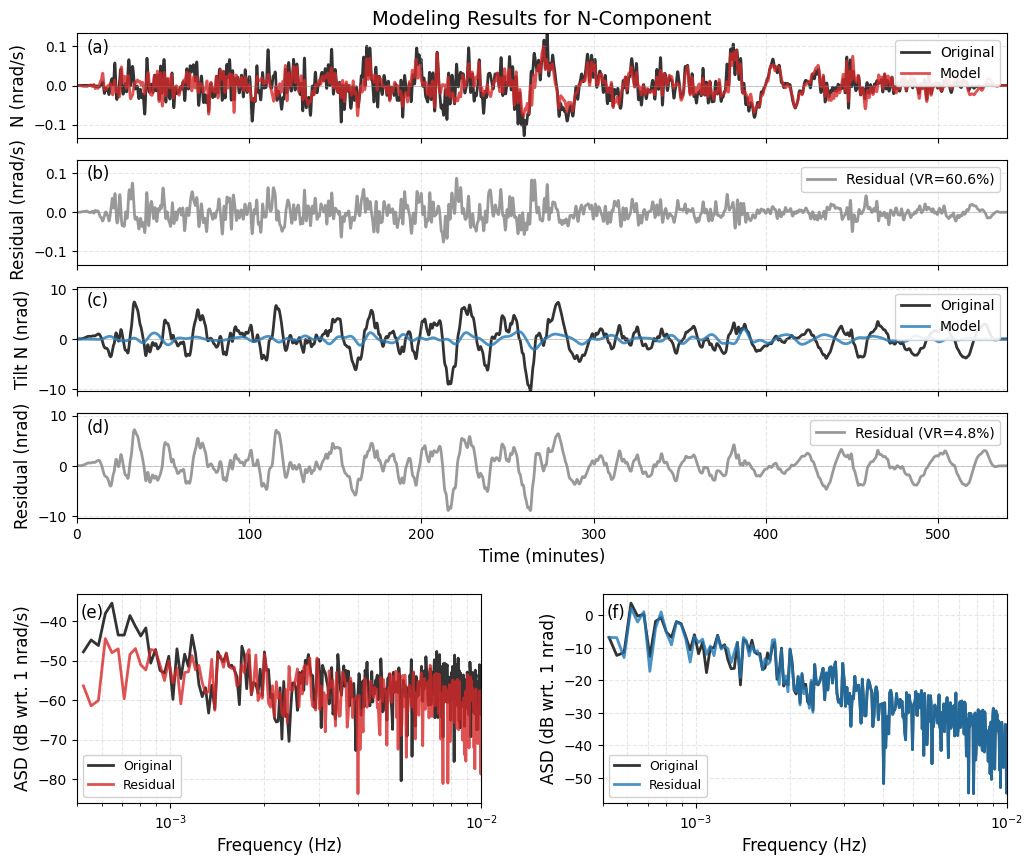

In [19]:
fig = plot_component_modeling(model1, model2, component='N', time_unit='minutes', sampling_rate=1, fmin=fmin, fmax=fmax)

fig.savefig(f"{path_to_figs}{date}_{station}_N_model_workflow.png", dpi=150, bbox_inches="tight")

/tmp/ipykernel_720358/1030247562.py:223: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


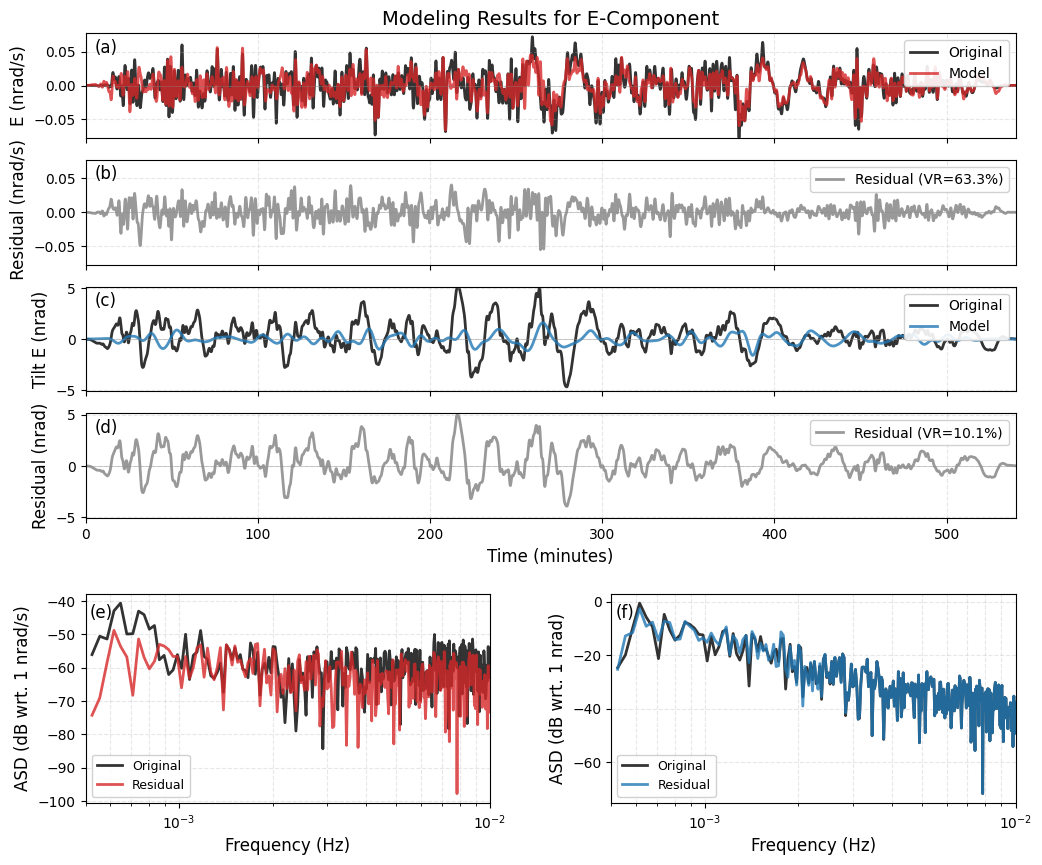

In [20]:
fig = plot_component_modeling(model1, model2, component='E', time_unit='minutes', sampling_rate=1, fmin=fmin, fmax=fmax)

fig.savefig(f"{path_to_figs}{date}_{station}_E_model_workflow.png", dpi=150, bbox_inches="tight")